# Study of the special tokens

In [1]:
import os
import pickle
from tabulate import tabulate
from scipy.stats import ttest_ind

cwd = os.getcwd().split(os.path.sep)
while cwd[-1] != "stage_4_gm":
    os.chdir("..")
    cwd = os.getcwd().split(os.path.sep)
dir = os.path.join(".cache", "plots", "cls_study")
with open(os.path.join(dir, "attention_sep_cls.pickle"), "rb") as f:
    attention = pickle.load(f)

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from attention_algorithms.attention_metrics import plot_color_from_ax, default_plot_colormap

## Entailment

In [3]:
%%capture
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plot_color_from_ax(attention["entailement"]["cls"].mean(axis=-1), axes[0],
                           ylabel="layer",
                           xlabel="head", title = "CLS")
plot_color_from_ax(attention["entailement"]["sep_1"].mean(axis=-1), axes[1],
                           ylabel="layer",
                           xlabel="head", title = "SEP 1")
plot_color_from_ax(attention["entailement"]["sep_2"].mean(axis=-1), axes[2],
                           ylabel="layer",
                           xlabel="head", title = "SEP 2")
fig.savefig(os.path.join(os.getcwd(),".cache", "plots", "cls_study", "special_tokens_study_entailment.png"))

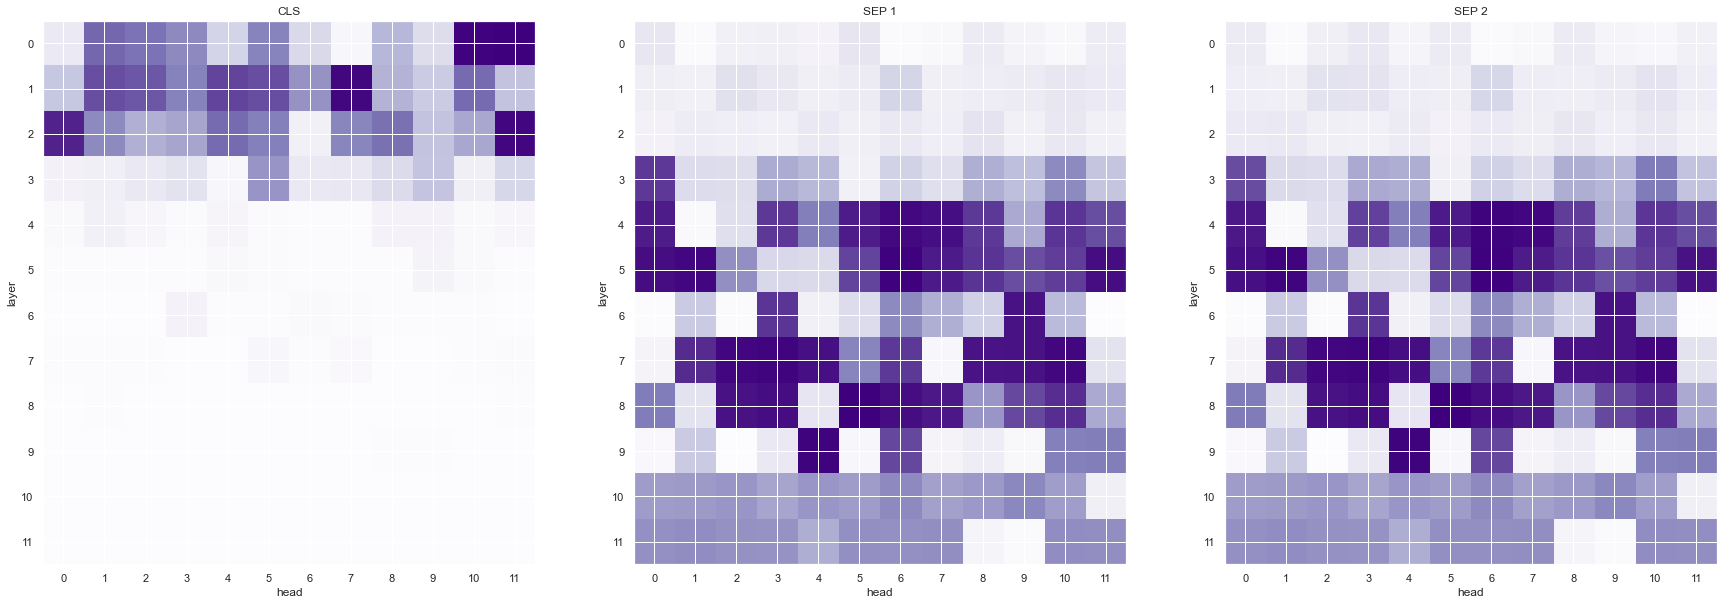

In [4]:
fig

In [5]:
test_entailment = ttest_ind(attention["entailement"]["sep_1"], attention["entailement"]["sep_2"], axis=-1)

## Contradiction

In [6]:
%%capture
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plot_color_from_ax(attention["contradiction"]["cls"].mean(axis=-1), axes[0],
                           ylabel="layer",
                           xlabel="head", title = "CLS")
plot_color_from_ax(attention["contradiction"]["sep_1"].mean(axis=-1), axes[1],
                           ylabel="layer",
                           xlabel="head", title = "SEP 1")
plot_color_from_ax(attention["contradiction"]["sep_2"].mean(axis=-1), axes[2],
                           ylabel="layer",
                           xlabel="head", title = "SEP 2")
fig.savefig(os.path.join(os.getcwd(),".cache", "plots", "cls_study", "special_tokens_study_contradiction.png"))

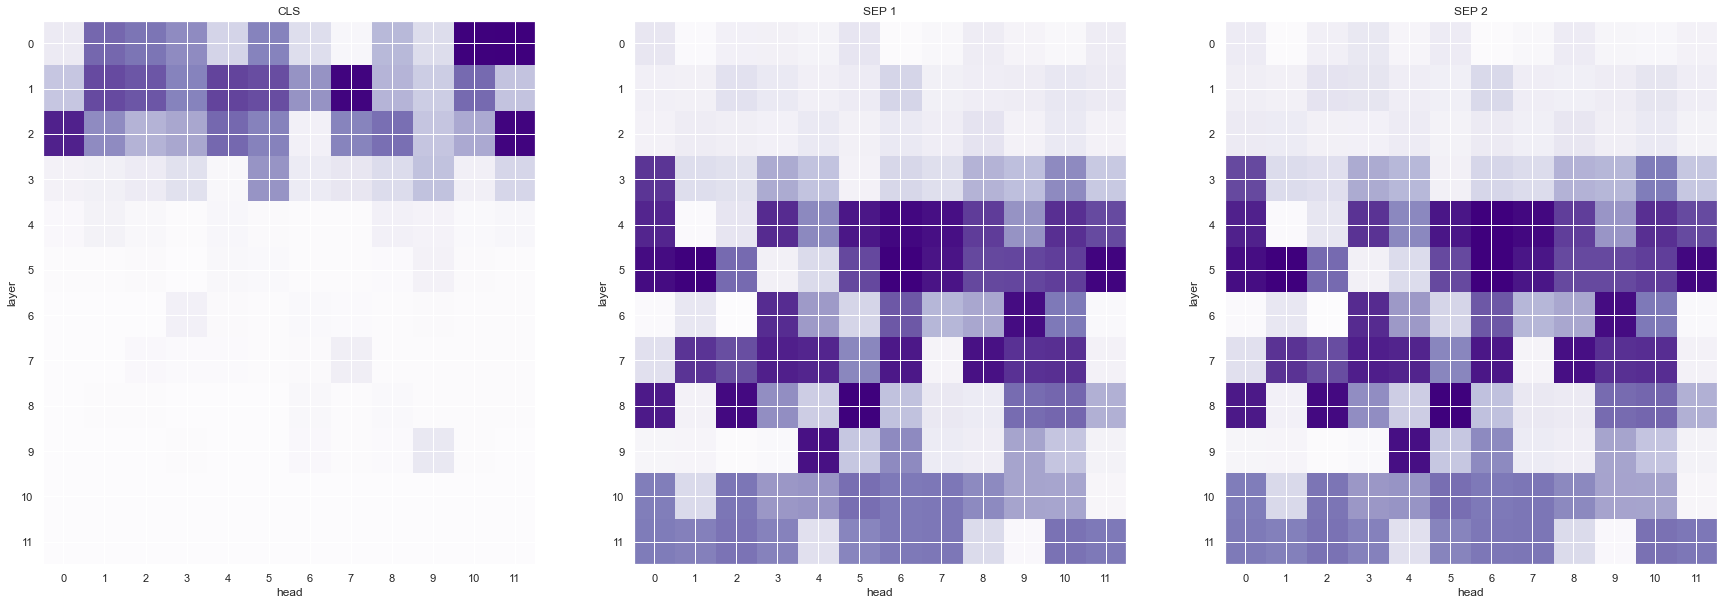

In [7]:
fig

In [8]:
test_contradiction = ttest_ind(attention["contradiction"]["sep_1"], attention["contradiction"]["sep_2"], axis=-1)

## Neutrals

In [9]:
%%capture
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plot_color_from_ax(attention["neutral"]["cls"].mean(axis=-1), axes[0],
                           ylabel="layer",
                           xlabel="head", title = "CLS")
plot_color_from_ax(attention["neutral"]["sep_1"].mean(axis=-1), axes[1],
                           ylabel="layer",
                           xlabel="head", title = "SEP 1")
plot_color_from_ax(attention["neutral"]["sep_2"].mean(axis=-1), axes[2],
                           ylabel="layer",
                           xlabel="head", title = "SEP 2")
fig.savefig(os.path.join(os.getcwd(),".cache", "plots", "cls_study", "special_tokens_study_neutral.png"))

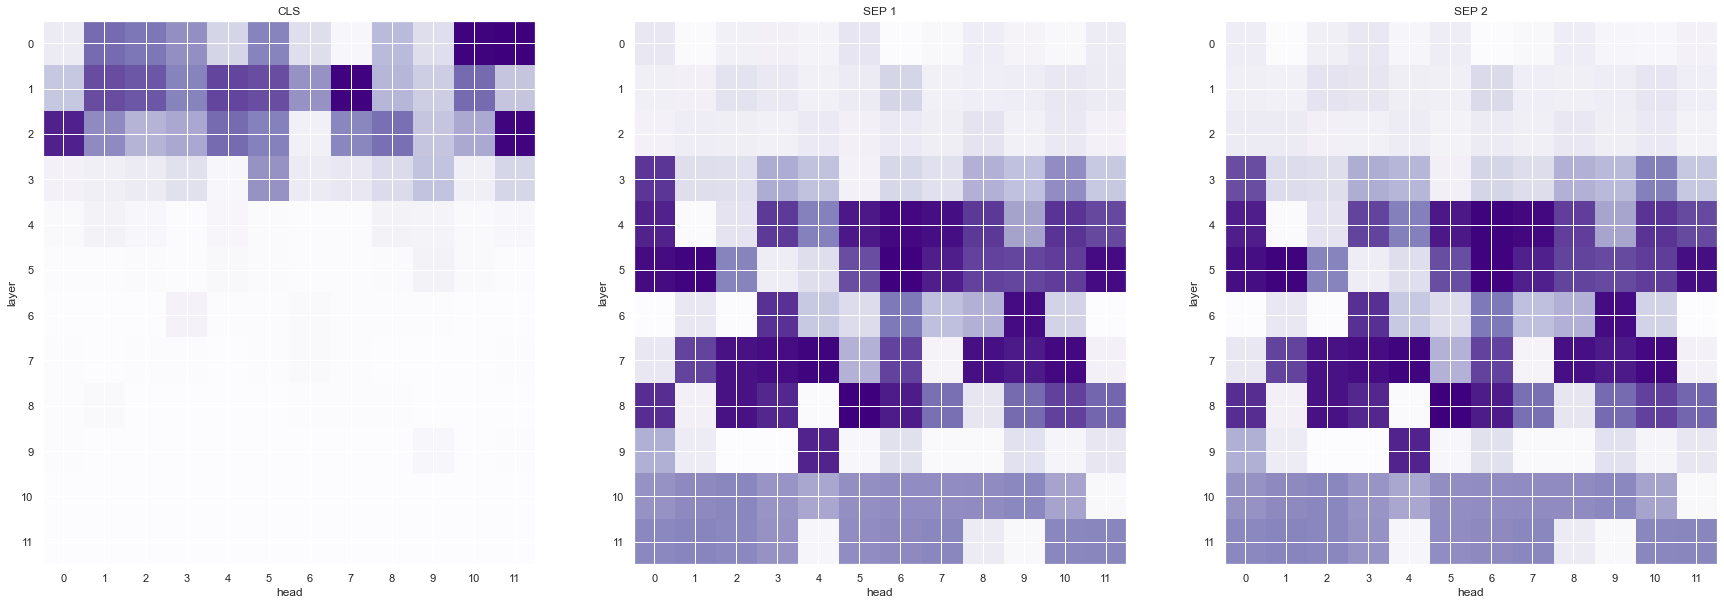

In [10]:
fig

In [11]:
test_neutral = ttest_ind(attention["neutral"]["sep_1"], attention["neutral"]["sep_2"], axis=-1)

## Look at the different p_value table

In [12]:
%%capture
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plot_color_from_ax(test_entailment[1], axes[0],
                           ylabel="layer",
                           xlabel="head", title = "Entailement")
plot_color_from_ax(test_neutral[1], axes[1],
                           ylabel="layer",
                           xlabel="head", title = "Neutral")
plot_color_from_ax(test_contradiction[1], axes[2],
                           ylabel="layer",
                           xlabel="head", title = "Contradiction")
fig.savefig(os.path.join(os.getcwd(),".cache", "plots", "cls_study", "cls_study_p_value_sep_difference.png"))

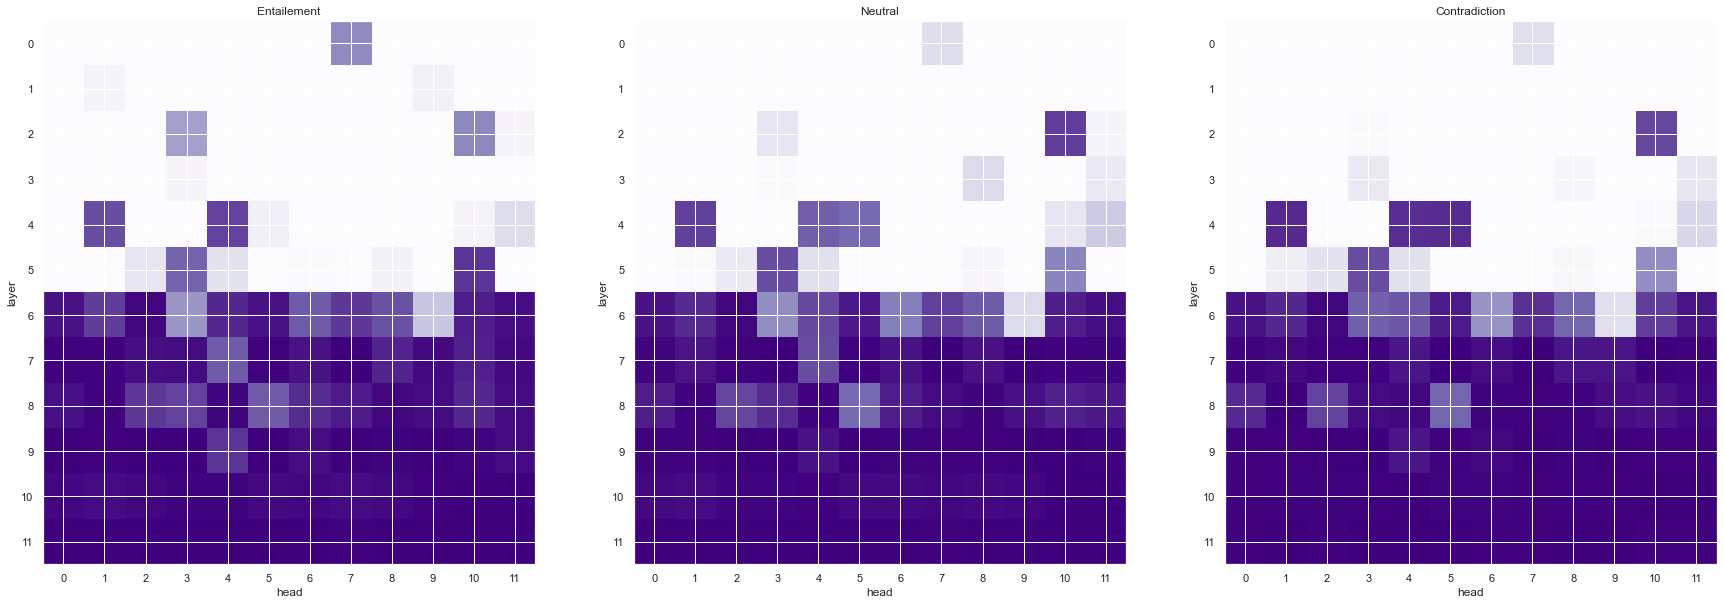

In [13]:
fig

## Observations

- nous n'avons pas de comportement différent suivant le label que choisissons nous n'avons ici aucun changement flagrant

- à partir de la couche 4 on n'a plus du tout d'attention sur le token [SEP] cela rejoint nos observations précédentes sur l'étude de l'entropy.

- Quand on regarde l'attention sur le token SEP, nous avons une fois de plus un critère qui va changer sur les deux dernière couches